In [47]:
from robustsp import *
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import scipy.io
import pkg_resources

'''
n =

   400


MSElasso =

   83.5977

rankflasso: starting iterations

MSE_rank1 =

  105.8938

rankflasso: starting iterations

MSE_rank2 =

   21.8556
'''

In [48]:
# Read image of sqares (20 x 20 pixels)
path = pkg_resources.resource_filename('robustsp', 'data/images.mat')
# contains the vectors y20 (clean data) and y20n (noisy data)
img = scipy.io.loadmat(path,struct_as_record=False)
y20 = img['y20']
y20n = img['y20n']
n = y20.size
scaledata = lambda x: 3*(x-np.min(x)) / (np.max(x) - np.min(x))

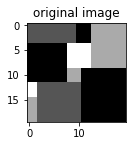

In [63]:
# Plot the image
fig1 = plt.figure(1)
ax0 = fig1.add_subplot(2,2,1)

ax0.set_title('original image')
ax0.imshow(np.reshape(y20,(int(np.sqrt(n)),int(np.sqrt(n))),order="F"),
              interpolation='none', cmap=plt.cm.gray)

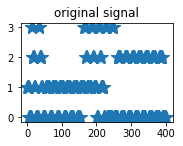

In [54]:
# Plot the signal
plt.figure(2)
ax02 = plt.subplot(2,2,1) # ,aspect='equal'
#plt.axis('tight')
#plt.autoscale(axis='both')
ax02.set_title('original signal')
ax02.plot(range(1,n+1),y20,'*',markersize=14)

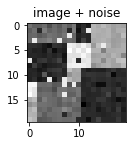

In [65]:
# Plot the image + noise
fig1
ax2 = plt.subplot(2,2,2)

ax2.set_title('image + noise')
ax2.imshow(np.reshape(y20n,(int(np.sqrt(n)),int(np.sqrt(n))),order="F"),
              interpolation='none', cmap=plt.cm.gray)

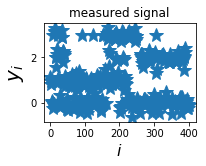

In [69]:
# Plot the noisy (measured) signal
fig2
ax12 = plt.subplot(2,2,2) # ,aspect='equal'
ax12.set_title('measured signal')
ax12.set_xlabel(r"$i$",fontsize=16)
ax12.set_ylabel(r"$y_{i}$",fontsize=20)
ax12.plot(range(1,n+1),y20n,'*',markersize=14)


In [71]:
# Compute the Lasso solution
L = 20
